<a href="https://colab.research.google.com/github/beyzaturku/Weather_Detection_Using_CNN/blob/main/Weather_Detection_8_Comprasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python --version

Python 3.11.11


In [3]:
!pip install opencv-python

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
zip_path = '/content/drive/MyDrive/Weather_Detection/wd_dataset.zip'

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Google Colab'a dosya yükleme işlemi

In [54]:
from google.colab import files
uploaded = files.upload()

Veri Setini Yükleme

In [6]:
# Assuming 'wd_dataset' is the extracted folder name inside your Google Drive
image_folder = '/content/drive/MyDrive/Weather_Detection/Multi_Class_Weather_Dataset'


subfolders = [ 'Cloudy', 'Rain', 'Shine', 'Sunrise']
label_map = { subfolder: idx for idx, subfolder in enumerate(subfolders)}

# List of Images and Labels
images = []
labels = []

# Loading Dataset
for subfolder in subfolders:
    subfolder_path = os.path.join(image_folder, subfolder)
    for filename in os.listdir(subfolder_path):
        img_path = os.path.join(subfolder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (224,224))
            images.append(img_resized)
            labels.append(label_map[subfolder])

# Coverted to Numpy Arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the Images
images = images.astype('float32') / 255.0

Dosya path'lerini kategorilendirme

In [7]:
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes = len(subfolders))

#labels dizisi, her görüntünün sınıfını belirten sayısal etiketleri içerir.
#labels dizininde bulunan kategori etiketlerini one-hot encoding formatına dönüştürür.

Veri Setini Bölme

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size = 0.2, stratify = labels_one_hot, random_state = 42)

In [17]:
print("Training data shape:", X_train.shape, "Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape, "Test labels shape:", y_test.shape)

Training data shape: (898, 224, 224, 3) Training labels shape: (898, 4)
Test data shape: (225, 224, 224, 3) Test labels shape: (225, 4)


Model Mimarisi Kurma

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(1,1),input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(4, activation='softmax'))


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=20, verbose=2, batch_size=50, validation_data=(X_test, y_test));

Epoch 1/20
18/18 - 4s - 244ms/step - accuracy: 0.9621 - loss: 0.1185 - val_accuracy: 0.8667 - val_loss: 0.5963
Epoch 2/20
18/18 - 1s - 63ms/step - accuracy: 0.9644 - loss: 0.0968 - val_accuracy: 0.8800 - val_loss: 0.4475
Epoch 3/20
18/18 - 1s - 63ms/step - accuracy: 0.9755 - loss: 0.0715 - val_accuracy: 0.8800 - val_loss: 0.3887
Epoch 4/20
18/18 - 1s - 64ms/step - accuracy: 0.9822 - loss: 0.0535 - val_accuracy: 0.8800 - val_loss: 0.4713
Epoch 5/20
18/18 - 1s - 65ms/step - accuracy: 0.9822 - loss: 0.0488 - val_accuracy: 0.8800 - val_loss: 0.5573
Epoch 6/20
18/18 - 1s - 63ms/step - accuracy: 0.9833 - loss: 0.0405 - val_accuracy: 0.8356 - val_loss: 0.7775
Epoch 7/20
18/18 - 1s - 64ms/step - accuracy: 0.9889 - loss: 0.0439 - val_accuracy: 0.8622 - val_loss: 0.6207
Epoch 8/20
18/18 - 1s - 64ms/step - accuracy: 0.9933 - loss: 0.0237 - val_accuracy: 0.8711 - val_loss: 0.7030
Epoch 9/20
18/18 - 1s - 64ms/step - accuracy: 0.9822 - loss: 0.0441 - val_accuracy: 0.8444 - val_loss: 0.7194
Epoch 10/

Accuracy Grafiği

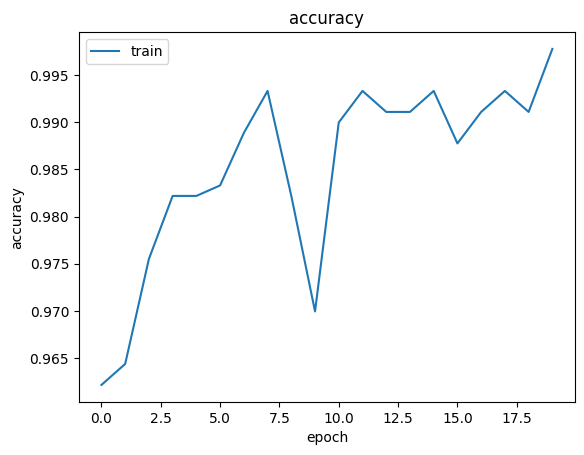

In [27]:
# Accuracy graph
plt.plot(history.history['accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy')
plt.show()

Loss Grafiği

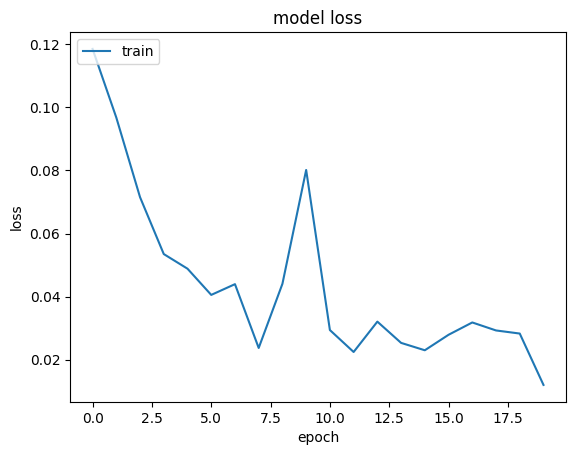

In [28]:
import matplotlib.pyplot as plt

# Loss graph
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss')
plt.show()

In [29]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8812 - loss: 0.7708
Test accuracy: 0.8799999952316284
Test loss: 0.8134340643882751


In [30]:
# Classification Report

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred, target_names=subfolders))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

      Cloudy       0.78      0.82      0.80        60
        Rain       0.89      0.74      0.81        43
       Shine       0.85      0.92      0.88        50
     Sunrise       0.99      0.99      0.99        72

    accuracy                           0.88       225
   macro avg       0.88      0.87      0.87       225
weighted avg       0.88      0.88      0.88       225



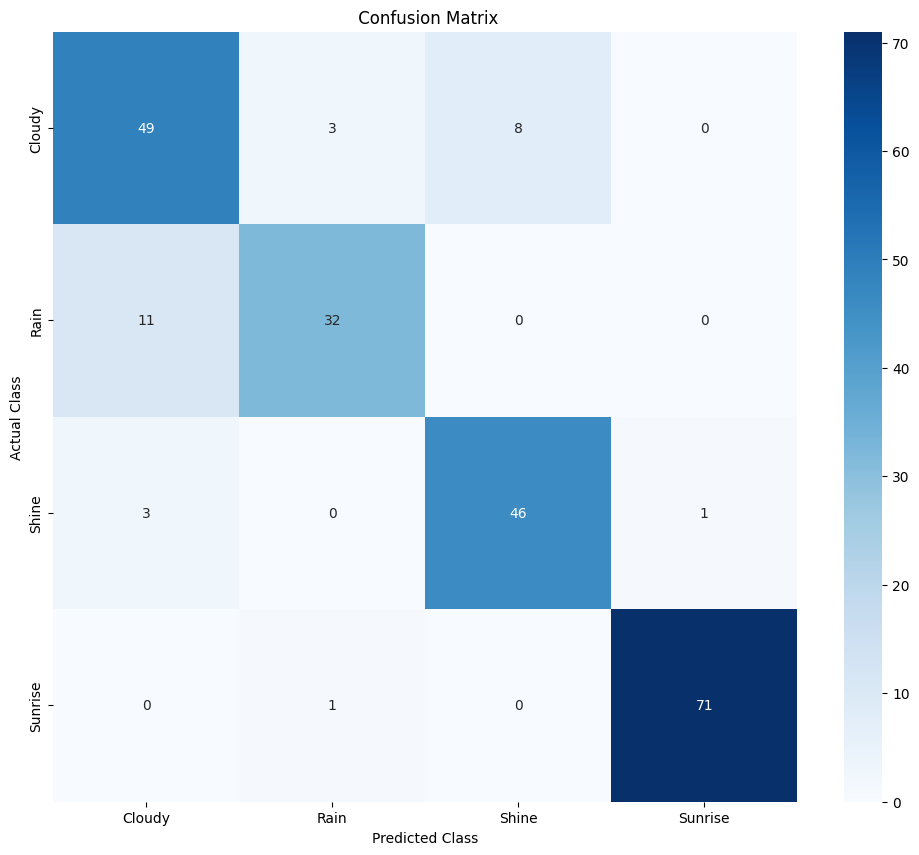

In [31]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,10))
sns.heatmap(conf_mat , annot =True, fmt = 'd', cmap = 'Blues', xticklabels = subfolders, yticklabels = subfolders)
plt.title(" Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

Eğitim ve Doğrulama Sonuçları Grafikleri

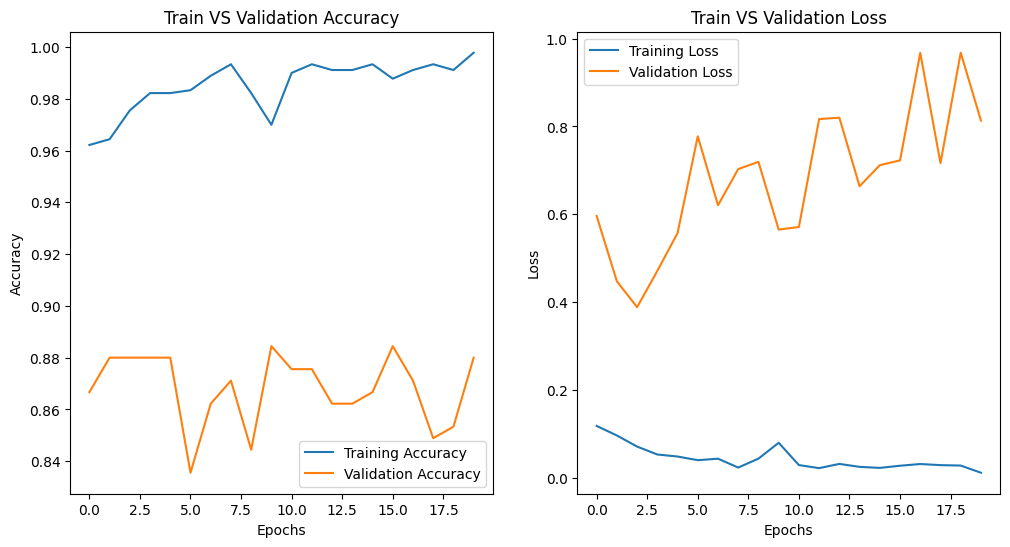

In [32]:
# Plotting for Training and Validation Results

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Train VS Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Train VS Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Model Karşılaştırma

In [33]:
# Using 3 Pre-Trained Models for Comparizon


from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def build_model(base_model, num_classes=4):
    # Freeze the base model layers
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),  # Replace MaxPooling2D with GlobalAveragePooling2D
        BatchNormalization(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer for 4 classes
    ])
    return model

# Load pre-trained base models
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build full models
models = {
    'VGG16': build_model(base_model_vgg16),
    'ResNet50': build_model(base_model_resnet50),
    'MobileNetV2': build_model(base_model_mobilenetv2)
}

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Modellerin Eğitimi
VGG16, ResNet50, MobileNetV2

In [34]:
# Compiling models
models = {
    'VGG16': build_model(VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
    'ResNet50': build_model(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))),
    'MobileNetV2': build_model(MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
}

# Compile models
for name, model in models.items():
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train models
histories = {}
for name, model in models.items():
    print(f"Training {name} model...")
    history = model.fit(X_train, y_train,
                        epochs=12,
                        validation_data=(X_test, y_test)
                        )
    histories[name] = history
    print(f"{name} training completed.")

Training VGG16 model...
Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 29s 416ms/step - accuracy: 0.5246 - loss: 1.1490 - val_accuracy: 0.4844 - val_loss: 1.1678
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.8996 - loss: 0.3074 - val_accuracy: 0.5689 - val_loss: 1.0486
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9350 - loss: 0.2025 - val_accuracy: 0.6622 - val_loss: 0.8621
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9415 - loss: 0.1864 - val_accuracy: 0.7200 - val_loss: 0.7628
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.9463 - loss: 0.1668 - val_accuracy: 0.7733 - val_loss: 0.6509
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.9549 - loss: 0.1271 - val_accuracy: 0.8356 - val_loss: 0.5536
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.9595 - loss: 0.1171 - val_accuracy: 0.8933 - val_loss: 0.4752
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.9701 - loss: 

Modellerin Değerlendirilmesi ve Karşılaştırılması

In [35]:
results = {}
modelss = {
    'Basic CNN': model,
    'VGG16': models['VGG16'],
    'ResNet50': models['ResNet50'],
    'MobileNetV2': models['MobileNetV2']
}

for name, model in modelss.items():
    print(f"Evaluating {name} model...")
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    results[name] = test_accuracy
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")

# Optional: Sort and display results
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Ranking:")
for name, accuracy in sorted_results:
    print(f"{name}: {accuracy:.4f}")

Evaluating Basic CNN model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9472 - loss: 0.1174
Basic CNN Test Accuracy: 0.9467
Evaluating VGG16 model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.9278 - loss: 0.1908
VGG16 Test Accuracy: 0.9289
Evaluating ResNet50 model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6341 - loss: 0.8351
ResNet50 Test Accuracy: 0.6133
Evaluating MobileNetV2 model...
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9472 - loss: 0.1174
MobileNetV2 Test Accuracy: 0.9467

Model Performance Ranking:
Basic CNN: 0.9467
MobileNetV2: 0.9467
VGG16: 0.9289
ResNet50: 0.6133


Sonuçların Görselleştirilmesi

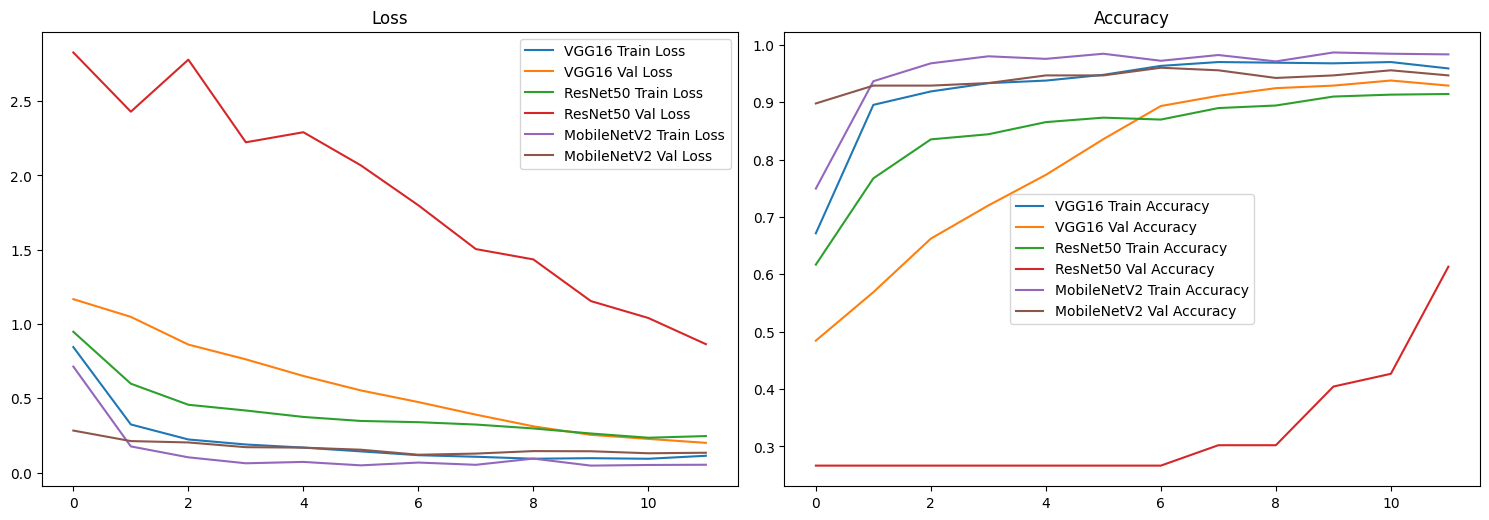

In [36]:
plt.figure(figsize=(15, 10))

for name, history in histories.items():
    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label=f'{name} Train Loss')
    plt.plot(history.history['val_loss'], label=f'{name} Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history.history['accuracy'], label=f'{name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{name} Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

Confusion Matrix for VGG16 model:
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step


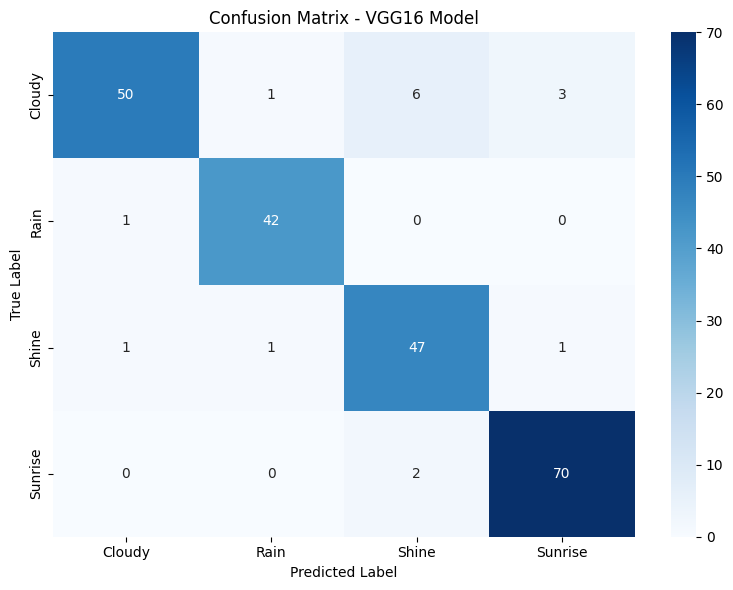


Classification Report for VGG16 model:
              precision    recall  f1-score   support

      Cloudy       0.96      0.83      0.89        60
        Rain       0.95      0.98      0.97        43
       Shine       0.85      0.94      0.90        50
     Sunrise       0.95      0.97      0.96        72

    accuracy                           0.93       225
   macro avg       0.93      0.93      0.93       225
weighted avg       0.93      0.93      0.93       225

Confusion Matrix for ResNet50 model:
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 619ms/step


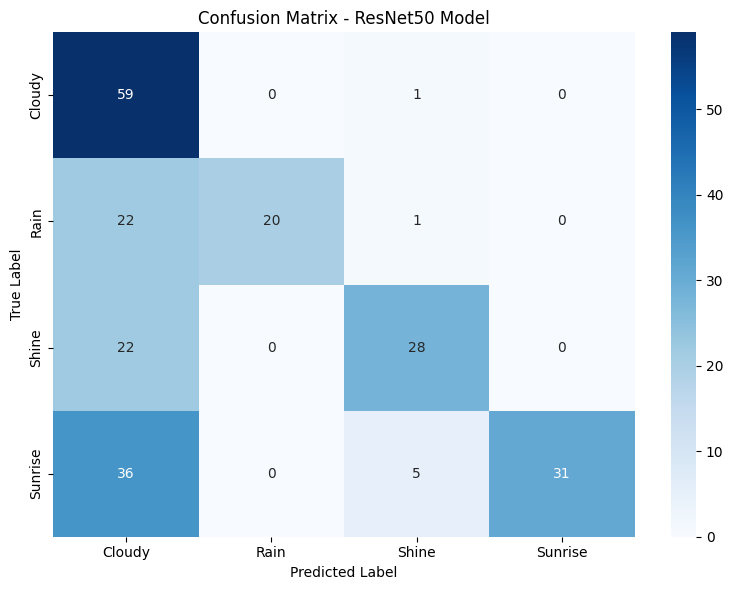


Classification Report for ResNet50 model:
              precision    recall  f1-score   support

      Cloudy       0.42      0.98      0.59        60
        Rain       1.00      0.47      0.63        43
       Shine       0.80      0.56      0.66        50
     Sunrise       1.00      0.43      0.60        72

    accuracy                           0.61       225
   macro avg       0.81      0.61      0.62       225
weighted avg       0.80      0.61      0.62       225

Confusion Matrix for MobileNetV2 model:


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 421ms/step


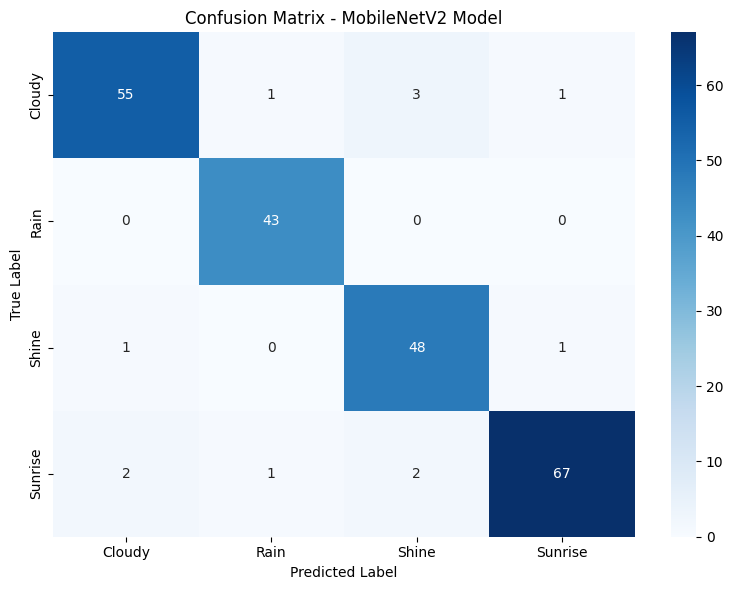


Classification Report for MobileNetV2 model:
              precision    recall  f1-score   support

      Cloudy       0.95      0.92      0.93        60
        Rain       0.96      1.00      0.98        43
       Shine       0.91      0.96      0.93        50
     Sunrise       0.97      0.93      0.95        72

    accuracy                           0.95       225
   macro avg       0.95      0.95      0.95       225
weighted avg       0.95      0.95      0.95       225



In [37]:
for name, model in models.items():
    print(f"Confusion Matrix for {name} model:")

    # Predict on test data
    y_pred = model.predict(X_test)

    # Convert one-hot encoded predictions to class labels
    predicted_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_test, axis=1)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=subfolders,
                yticklabels=subfolders)

    plt.title(f'Confusion Matrix - {name} Model')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    # Optional: Print classification report for more detailed metrics
    from sklearn.metrics import classification_report
    print(f"\nClassification Report for {name} model:")
    print(classification_report(true_labels, predicted_labels, target_names=subfolders))